In [1]:
import numpy as np
import pynbody
import pynbody.filt as filt
import pynbody.units as units
import pynbody.analysis.profile as profile
import matplotlib.pyplot as plt
import sys, os, glob, pickle, struct
import plot_tools
import make_plots

In [2]:
path30 = "/scratch/hc2347/pickles/30/oxhonly_2.141.p"
path60 = "/scratch/hc2347/pickles/60/CENTER60v1_2.994.p"

entry30 = plot_tools.load_halos_pickle(pickle_path=path30)
entry60 = plot_tools.load_halos_pickle(pickle_path=path60)

In [3]:
entry30['zred'] = 2.141
entry60['zred'] = 2.994

/home/hc2347/miniconda3/envs/py35/lib/python3.5/site-packages/pynbody/analysis/hmf.py:95: RuntimeWarning: Using the default power-spectrum spectrum which assumes ns=0.96 and WMAP7+H0+BAO transfer function.
  "Using the default power-spectrum spectrum which assumes ns=0.96 and WMAP7+H0+BAO transfer function.", RuntimeWarning)
/home/hc2347/miniconda3/envs/py35/lib/python3.5/site-packages/pynbody/simdict.py:92: RuntimeWarning: Assuming default value for property 'sigma8'=8.29e-01
  name, value), RuntimeWarning)
/home/hc2347/miniconda3/envs/py35/lib/python3.5/site-packages/pynbody/analysis/hmf.py:168: RuntimeWarning: Power spectrum does not extend to low enough k; using power-law extrapolation (this is likely to be fine)
  "Power spectrum does not extend to low enough k; using power-law extrapolation (this is likely to be fine)", RuntimeWarning)
/home/hc2347/miniconda3/envs/py35/lib/python3.5/site-packages/scipy/integrate/quadrature.py:802: AccuracyWarning: divmax (10) exceeded. Latest dif

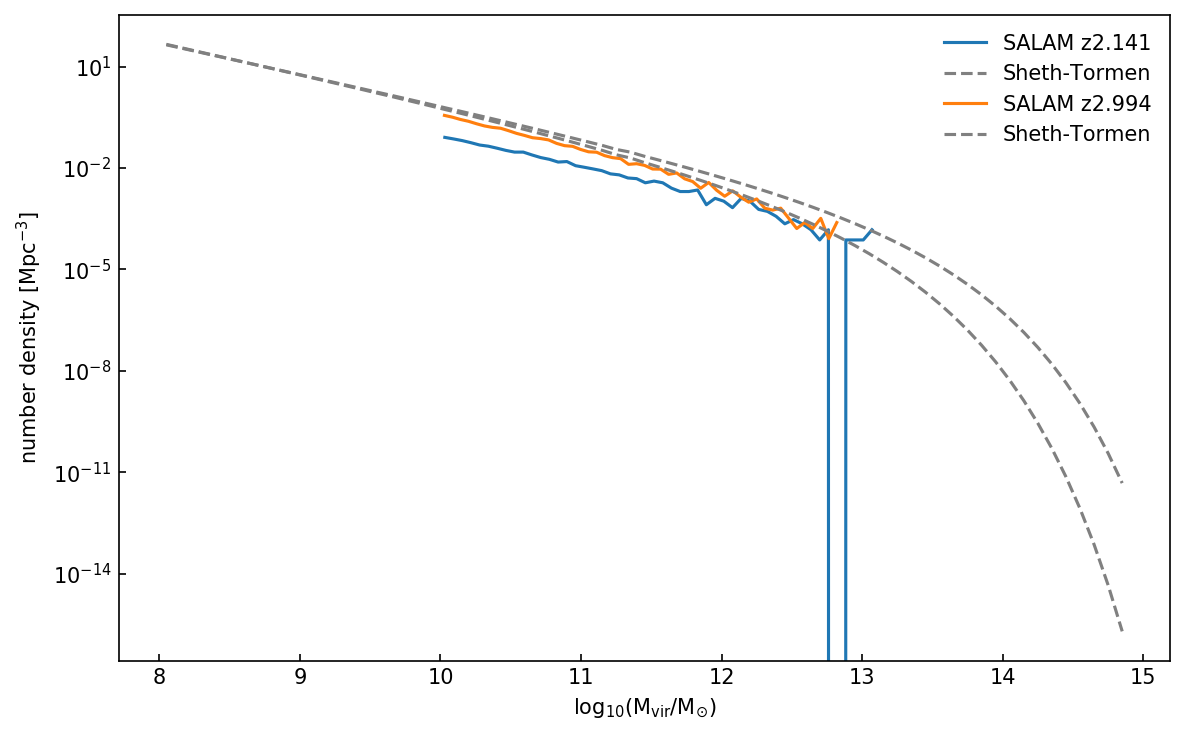

In [4]:
# Halo Mass Funciton
sim30 = "/scratch/kld8/simulations/LRZ_Planck30/planck.new.hydro.30_600.00224"
sim60 = "/scratch/kld8/simulations/LRZ_Planck60/planck.new.hydro.60_600.00156"

fig, ax = plt.subplots(figsize=(8,5), dpi=150)
make_plots.plot_HMF(simpath=sim30, entry=entry30, ax=ax)
make_plots.plot_HMF(sim60, entry60, ax=ax)

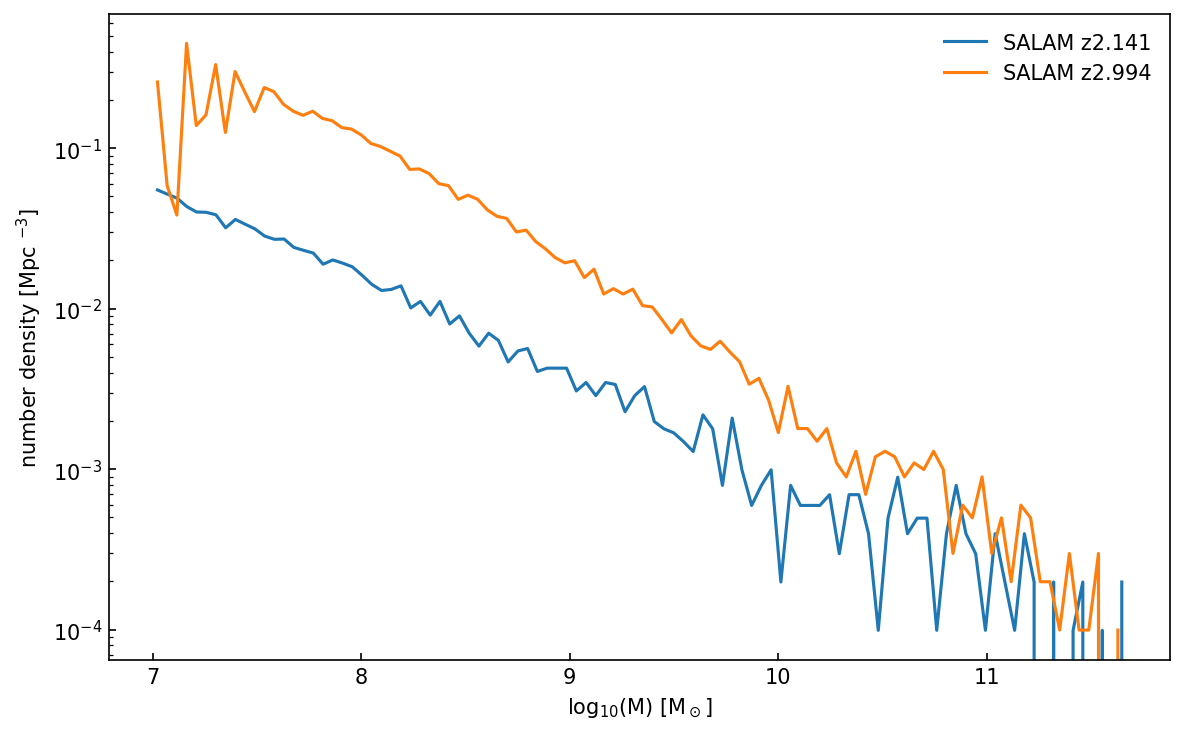

In [9]:
# SMF

fig, ax = plt.subplots(figsize=(8,5), dpi=150)
make_plots.plot_SMF(entry=entry30, bins=100, ax=ax)
make_plots.plot_SMF(entry=entry60, bins=100, ax=ax)

/scratch/hc2347/main/visualization/make_plots.py:157: RuntimeWarning: divide by zero encountered in log10
  ax.scatter(np.log10(nihao_x), nihao_y, color='maroon', label = "NIHAO Classic")


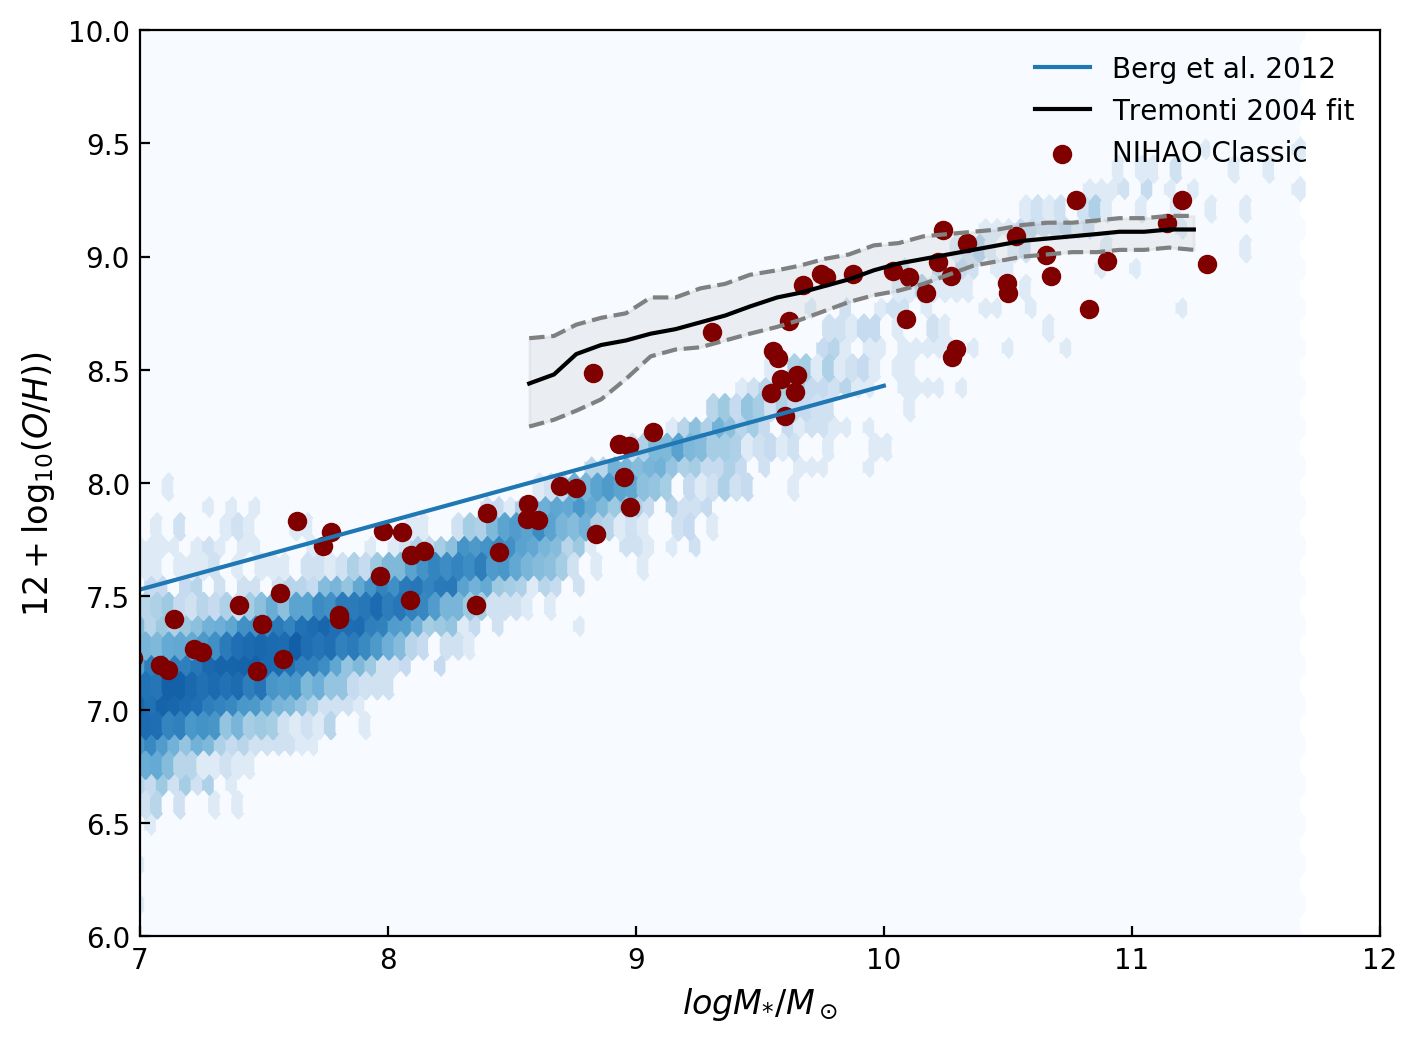

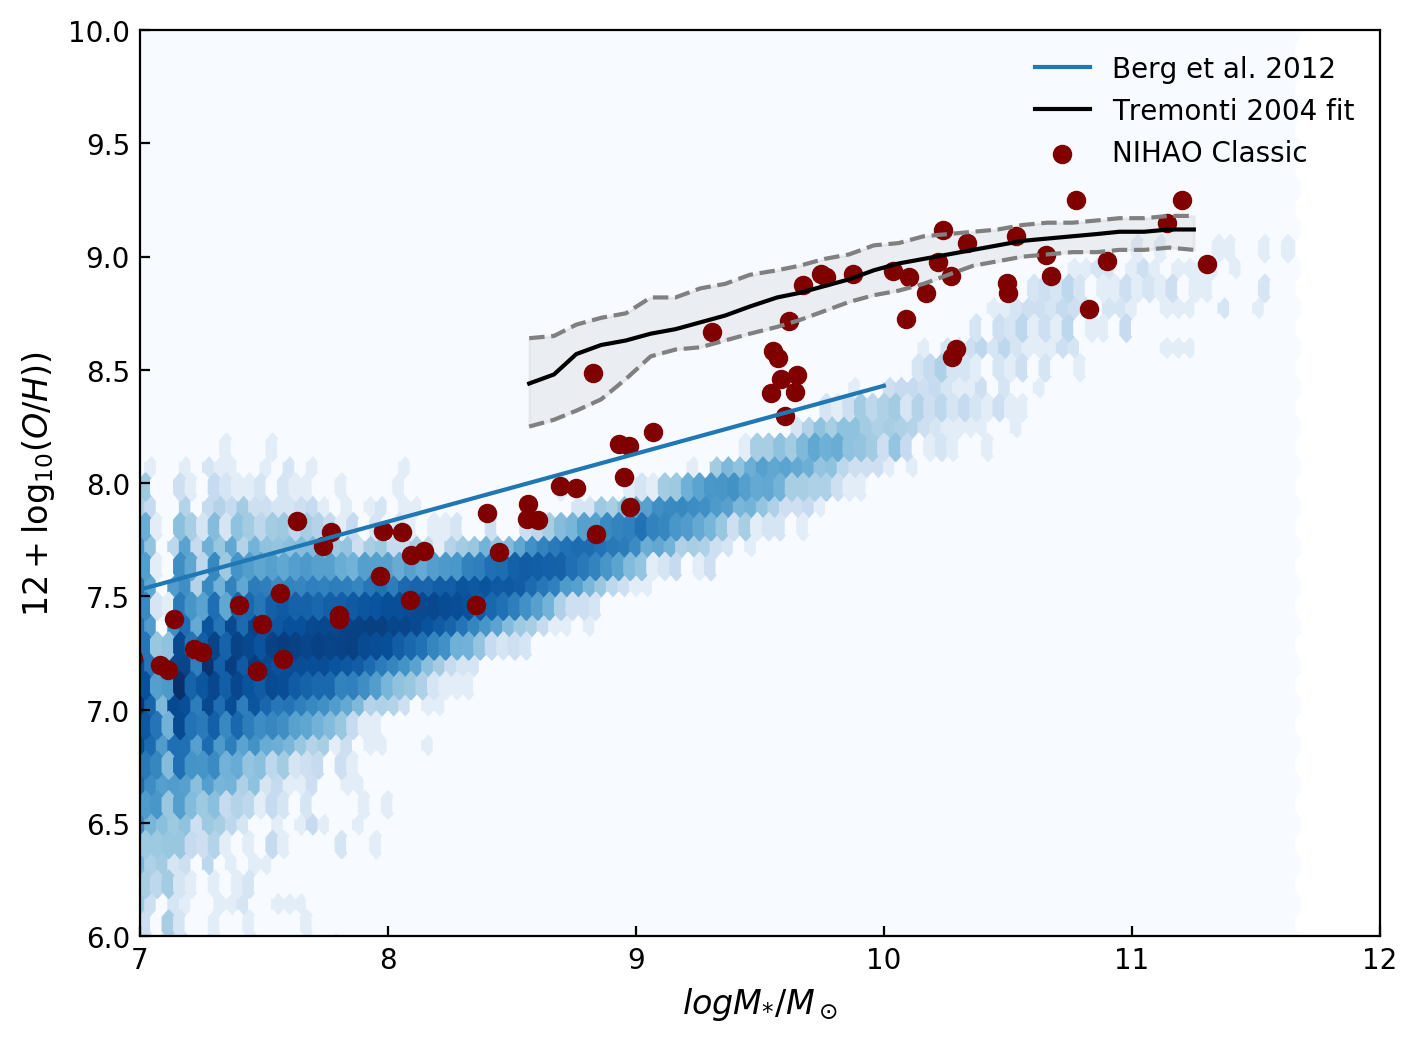

In [11]:
make_plots.plot_oxh(mstar=entry30['mstar'], oxh=entry30['oxh'])
make_plots.plot_oxh(mstar=entry60['mstar'], oxh=entry60['oxh'])